# Proyecto intermedio

**Muñoz Juárez Araceli**

_26 de Abril 2023_

**Ejercicio 1: Aproximación de π**

Una forma para estimar el valor de π (3.141592...) es usando el método de Monte Carlo. Primero, tomamos un cuadrado de 1 × 1 y un círculo inscrito de radio 1/2, generamos una cantidad arbitraria de puntos uniformemente distribuidos sobre la superficie del cuadrado y coloreamos de rojo aquellos que se encuentren sobre la superficie del círculo, y de azul, aquellos que estén fuera (ver Figura 1).

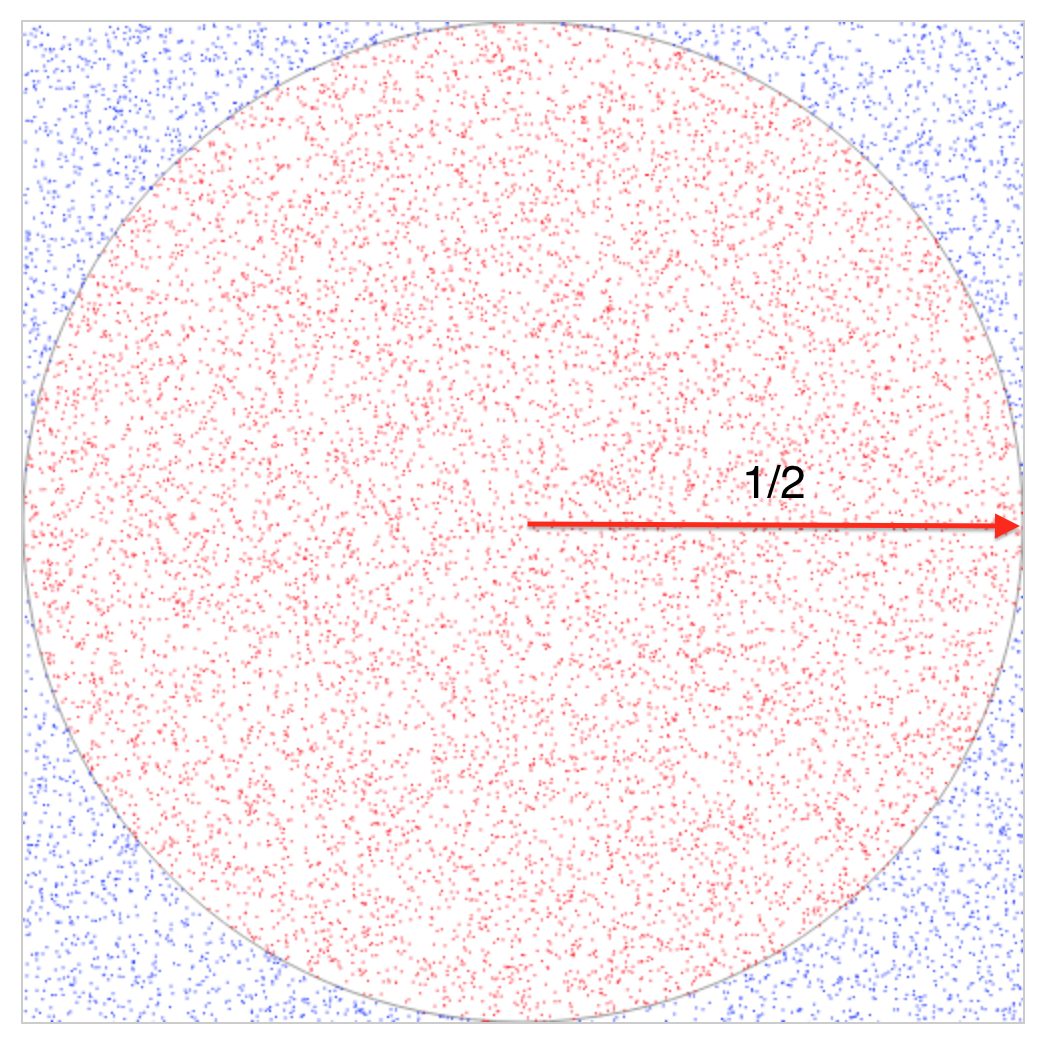

_**Figura 1:** Aproximación de π por el método de Monte Carlo_

Ahora, tenemos que el área del círculo esta dada por πr^2 =π/4, mientras que el área del cuadrado es igual a 1 por lo que, si dividimos el área del círculo entre el área del cuadrado, obtenemos π/4. Además, si _Nrojo_ es el número de puntos rojos y _Ntotal_ es el número total de puntos, entonces _Nrojo_/_Ntotal_ es una aproximación del cociente de las áreas para _Ntotal_ lo suficientemente grande; en otras palabras,

π/4 ≈ _Nrojo_/_Ntotal_,

de donde se sigue que π ≈ 4 _Nrojo_/_Ntotal_. 

La ecuación (1) nos da la estimación de π por el método Monte Carlo.

**1. Escribe un algoritmo que estime el valor de π y que te permita visualizar algo similar al gráfico de la Figura 1, asegúrate de incluir el conteo del número de puntos rojos, número de puntos totales, y la respectiva estimación de π .**

A continuación, presento el código de Julia que utilice:

In [9]:
using Plots

# Establecemos la cantidad de puntos a generar
n = 10000

# Generamos n puntos aleatorios dentro del cuadrado de 1x1
x = rand(n)
y = rand(n)

# Identificamos cuáles de estos puntos están dentro del círculo
r = sqrt.((x .- 0.5).^2 + (y .- 0.5).^2) # Distancia del punto al centro del círculo
indices_dentro_circulo = findall(r .<= 0.5) # Índices de los puntos dentro del círculo
indices_fuera_circulo = findall(r .> 0.5) # Índices de los puntos fuera del círculo

# Contamos cuántos puntos están dentro y fuera del círculo
n_dentro_circulo = length(indices_dentro_circulo)
n_fuera_circulo = length(indices_fuera_circulo)

# Estimamos el valor de pi
pi_estimado = 4 * n_dentro_circulo / n

# Creamos un gráfico que muestre los puntos dentro y fuera del círculo
scatter(x[indices_dentro_circulo], y[indices_dentro_circulo], color=:red, legend=:false)
scatter!(x[indices_fuera_circulo], y[indices_fuera_circulo], color=:blue, legend=:false)
plot!(x -> sqrt(0.25 - (x - 0.5)^2) + 0.5, 0, 1, color=:black, linewidth=2) # Dibuja el círculo inscrito en el cuadrado
plot!([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], color=:black, linewidth=2) # Dibuja el cuadrado

# Imprimimos el número de puntos dentro y fuera del círculo, la estimación de pi y el gráfico
println("Número de puntos dentro del círculo: $n_dentro_circulo")
println("Número de puntos fuera del círculo: $n_fuera_circulo")
println("Estimación de pi: $pi_estimado")


Número de puntos dentro del círculo: 7821
Número de puntos fuera del círculo: 2179
Estimación de pi: 3.1284


Con este código podemos obtener el número de puntos dentro del círculo, fuera del círculo y la estimacion de pi que da de acuerdo con el valor de n que yo establecí al principio del código. 

Al inicio del código yo establecí la variable _n_ como el total de puntos que quería que se mostraran, y  como ya se sabe, estos están aleatoriamente pocisionados dentro y fuera del círculo (en el resto del cuadrado). 

Al ejecutar el código los valores que se obtienen son 7,821 puntos dentro del círculo y 2,179 a fuera de este, si susmamos estos valores dos da 10,000, que seria el valor total de puntos (variable _n_)

Ahora, si aplicamos la fórmula que se nos proporciono en la descripción del ejercicio, tendríamos que:

π = 4 (7,821/10,000)

esto nos da que π es igual a 3.1284, y esto comprobaría lo que se obtiene en el código. 

Posteriormente, este código lo introduje a la terminal de Julia para obtener la imagen del círculo con los colores de puntos de acuerdo a como se lo especifique.

A continuación presento cómo se veía desde la terminal y el resultado final

**a)**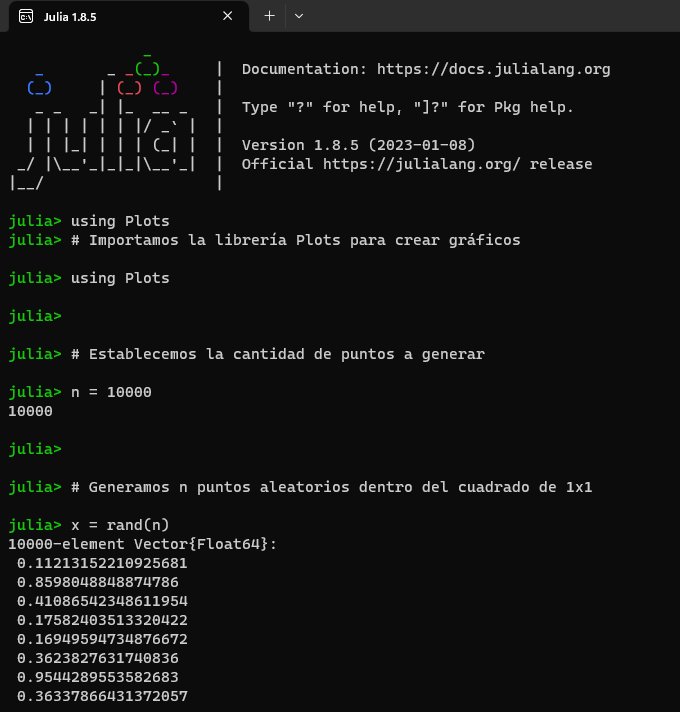

**b)**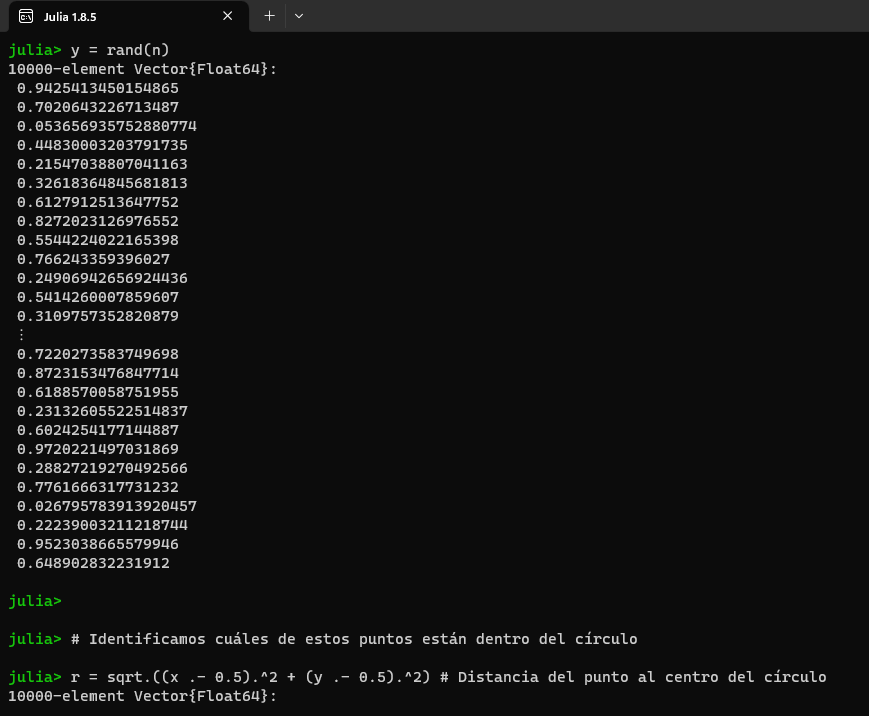

**c)**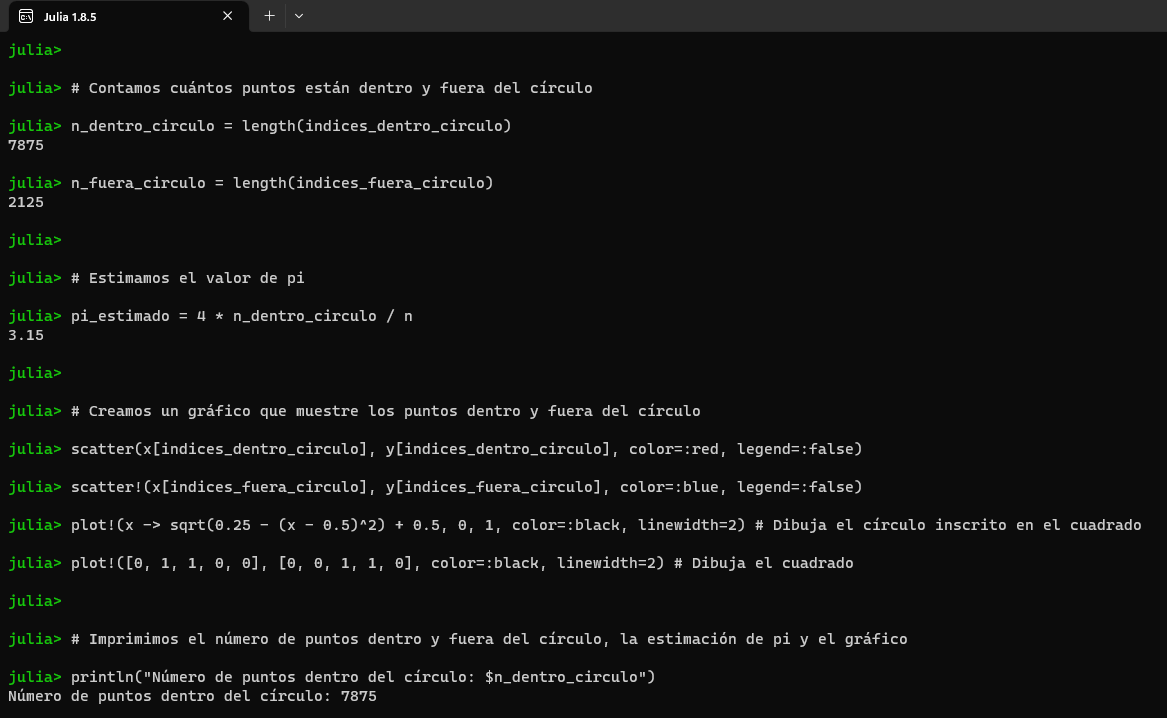

**d)**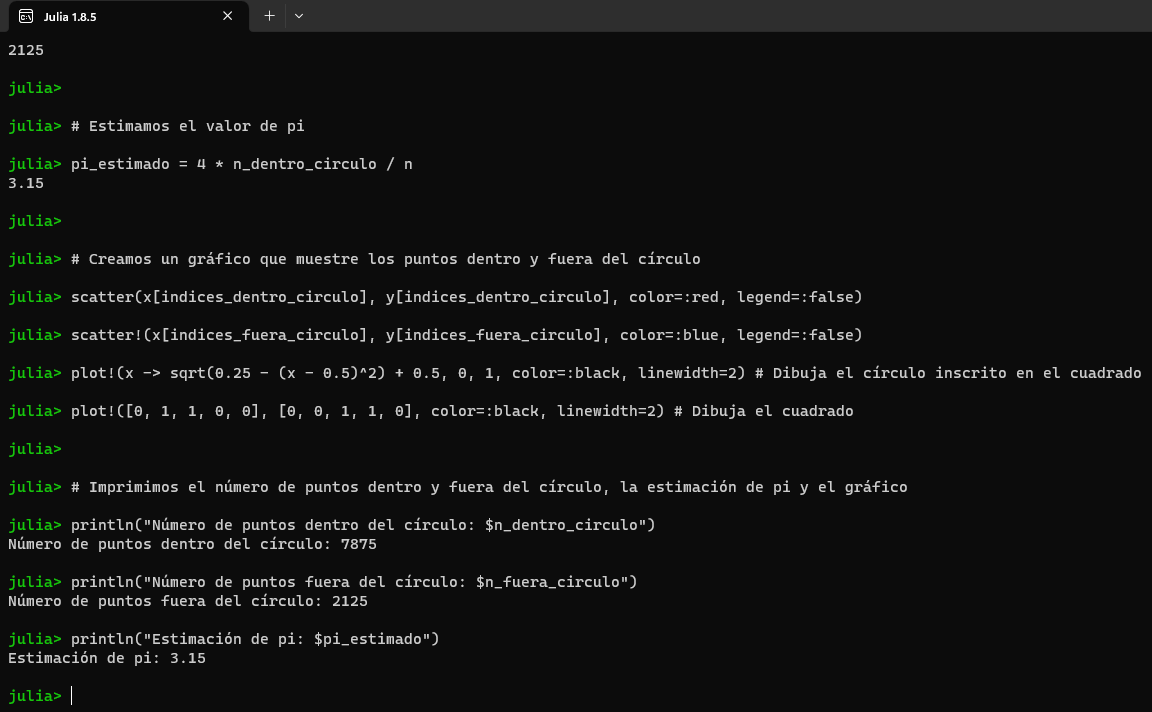

 _**Fig.2.** incisos a,b,c y d; Código desde la terminal de Julia_

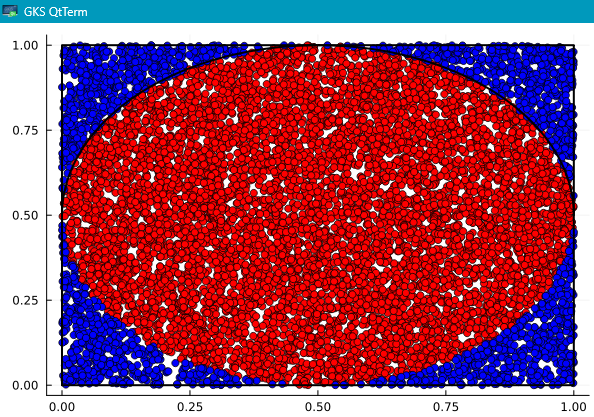

_**Fig.3** Resultado del código. En este se muetra el cuadrado de 1x1 con un círculo inscrito y los puntos rojos y azules_

**2. En promedio, ¿cuántos puntos necesitas generar para obtener una precisión de ±0.01?**

Para estimar cuántos puntos se necesitan generar para obtener una precisión de ±0.01, utilice la siguiente fórmula:

n = (z / e)^2

Donde z es el valor crítico de la distribución normal estándar para el nivel de confianza deseado (por ejemplo, para un nivel de confianza del 95%, z = 1.96), y e es la precisión deseada (en este caso, 0.01).

Reemplazando los valores en la fórmula, obtenemos:

n = (1.96 / 0.01)^2 ≈ 38416

Por lo tanto, en promedio, se necesitaran generar alrededor de 38,416 puntos para obtener una precisión de ±0.01 con un nivel de confianza del 95%.

**3. Realiza una gráfica del error de la estimación en función del número de puntos comparando contra el valor predeterminado de π de Julia (que se obtiene llamando a la constante pi).**

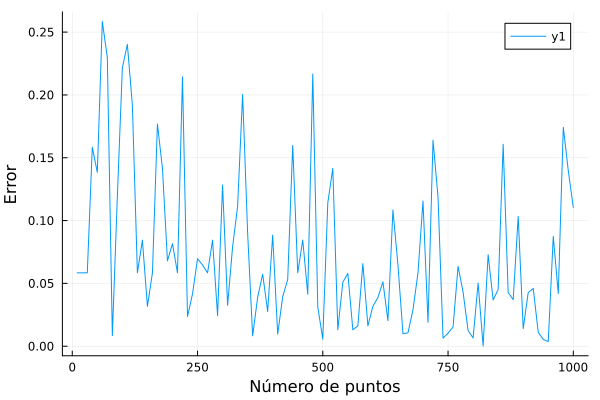

In [2]:
function monte_carlo_pi(n::Int)
    num_inside = 0
    for i in 1:n
        x, y = rand(), rand()
        if x^2 + y^2 <= 1
            num_inside += 1
        end
    end
    4num_inside/n
end

using Plots

function plot_pi_error(num_points::Vector{Int})
    pi_true = pi
    errors = Float64[]
    for n in num_points
        pi_est = monte_carlo_pi(n)
        error = abs(pi_true - pi_est)
        push!(errors, error)
    end
    plot(num_points, errors, xlabel="Número de puntos", ylabel="Error")
end

plot_pi_error(collect(10:10:1000))


En esta gráica se puede observar que entre mas puntos se impriman en el cuadrado, el error de estimación de pi sera menor, pues si  tenemos mas puntos hay ma sprobabilidad de que sean mas puntos los que se encuentren adentro del circulo que a fuera de este.

**Ejercicio 3: Torres de Hanoi**

El juego de las Torres de Hanoi consiste en tres estacas (izquierda, central y derecha) y n discos redondos de diferentes radios (perforados de forma que puedan encajar en las estacas). Inicialmente la estaca de la izquierda tiene todos los discos en orden creciente de tamaño de abajo hacia arriba. El objetivo del juego es mover todos los discos a la estaca de la derecha, usando la estaca central. En cada movimiento se desplaza el disco del extremo superior de una estaca a la otra, con la restricción de que no está permitido que un disco de radio mayor quede encima de uno de radio menor. Tu tarea es encontrar la secuencia de pasos que minimice el número de movimientos necesarios para cumplir el objetivo del juego. Es decir:

**Entrada**

Un valor entero positivo n (el número de discos).

**Salida**

Imprime el entero k: el número mínimo de movimientos.

Posteriormente imprime k líneas que describan la secuencia de movimientos. Cada línea debe tener dos enteros, a y b, que indican el movimiento: mover el disco de la estaca a a la estaca b, con a, b ∈ 1, 2, 3. Se considera que 1 es el disco de la izquierda, 2 el central y 3 el de la derecha.

1. Diseña un algoritmo que resuelva este problema y justifica (no es necesario escribir una demostración) por qué devuelve el número mínimo de movimientos. Represéntalo en pseudocódigo o diagrama de flujo.

2. Implementa el algoritmo en Julia. Tu programa será aceptado si devuelve las respuestas correctas para cada n, con 1 ≤ n ≤ 16.

_Ejemplo 2_

_Entrada:_

2

_Salida:_

3

1 2

1 3

2 3

**Diseña un algoritmo que resuelva este problema y justifica (no es necesario escribir una demostración) por qué devuelve el número mínimo de movimientos. Represéntalo en pseudocódigo o diagrama de flujo./Implementa el algoritmo en Julia. Tu programa será aceptado si devuelve las respuestas correctas para cada n, con 1 ≤ n ≤ 16.**


Para resolver el problema de Las Torres de Hanoi, se deben seguir ciertas reglas, como ese menciono en la descripción del problema:

1. Se tienen tres varillas y una pila de discos de diferentes tamaños en una de las varillas.
2. El objetivo es mover toda la pila de discos a otra de las varillas, utilizando la tercera varilla como auxiliar.
3. Solo se puede mover un disco a la vez y no se puede colocar un disco más grande sobre uno más pequeño.

La solución se puede lograr utilizando la recursividad, donde se mueve la pila de discos como si fuera una unidad, y se repite el proceso para una pila de discos más pequeña.

El algoritmo para resolver Las Torres de Hanoi con N discos realizaría las siguientes acciones: 

Primero movería la pila de discos superiores (n-1) de la varilla inicial a la varilla auxiliar; despues se mueve el disco más grande (n) de la varilla inicial a la varilla de destino, y luego movería la pila de discos superiores (n-1) de la varilla auxiliar a la varilla de destino, donde este proceso se repite hasta que todos los discos estén en la varilla de destino. 

Un **pseudocódigo** para el algoritmo de las Torres de Hanoi con N discos sería:

1. Si n = 1, mover el disco de la varilla de inicio a la varilla de destino.
2. Si n > 1, hacer lo siguiente:
   a. Mover la pila de discos superiores (n-1) de la varilla de inicio a la varilla auxiliar.
   b. Mover el disco más grande (n) de la varilla de inicio a la varilla de destino.
   c. Mover la pila de discos superiores (n-1) de la varilla auxiliar a la varilla de destino.
3. Repetir el paso 2 hasta que todos los discos estén en la varilla de destino.
 

Y un **diagrama de flujo** que progongo sería este :

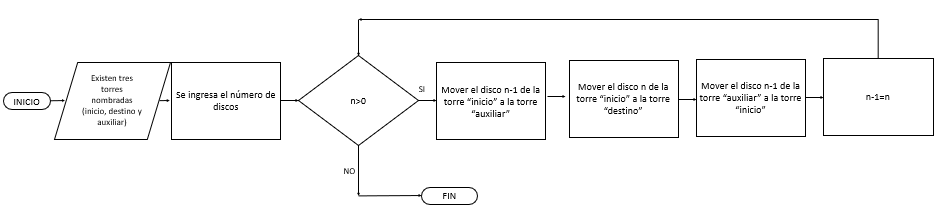

Ahora, el código que yo propongo es el siguiente:

In [30]:
function torres_hanoi(n::Int, inicio::String, auxiliar::String, destino::String, paso::Int=1)
    if n == 1
        println("$paso. Mover disco 1 de la varilla $inicio a la varilla $destino")
        paso += 1
    else
        paso = torres_hanoi(n-1, inicio, destino, auxiliar, paso)
        println("$paso. Mover disco $n de la varilla $inicio a la varilla $destino")
        paso += 1
        paso = torres_hanoi(n-1, auxiliar, inicio, destino, paso)
    end
    return paso
end


torres_hanoi (generic function with 3 methods)

In [42]:
torres_hanoi(6, "inicio", "auxiliar", "destino",)

1. Mover disco 1 de la varilla inicio a la varilla auxiliar
2. Mover disco 2 de la varilla inicio a la varilla destino
3. Mover disco 1 de la varilla auxiliar a la varilla destino
4. Mover disco 3 de la varilla inicio a la varilla auxiliar
5. Mover disco 1 de la varilla destino a la varilla inicio
6. Mover disco 2 de la varilla destino a la varilla auxiliar
7. Mover disco 1 de la varilla inicio a la varilla auxiliar
8. Mover disco 4 de la varilla inicio a la varilla destino
9. Mover disco 1 de la varilla auxiliar a la varilla destino
10. Mover disco 2 de la varilla auxiliar a la varilla inicio
11. Mover disco 1 de la varilla destino a la varilla inicio
12. Mover disco 3 de la varilla auxiliar a la varilla destino
13. Mover disco 1 de la varilla inicio a la varilla auxiliar
14. Mover disco 2 de la varilla inicio a la varilla destino
15. Mover disco 1 de la varilla auxiliar a la varilla destino
16. Mover disco 5 de la varilla inicio a la varilla auxiliar
17. Mover disco 1 de la varilla d

64

Este código establece un entero al que llame _n_ que vendría siendo el numero de discos que se encuentren en el problema; y de igual manera a mis torres 1, 2, 3 las nombre como inicio, destino y auxiliar, respectivamente, esto para tener mucho más ejemplificado el problema.

Y finalmente, como se muestra al ejecutar la celda, se muestran las lineas de los pasos a seguir para resolver el problema con el mínimo de movimientos posibles, estas líneas cuentan con una enumeración para saber cuántos movimientos exactamente fueron en total. Por lo que, tal vez no cuentan con dos enteros cada una pero es porque en vez de llamar como 1, 2, 3 a mis torres las nombre con caracteres para así ejemplificar mejor el problema.


Finamlmente, podemos saber que efectivamente cumple con la funcion de generar el minimo de movimientos posibles para resolver el problema porque, este problema se resuelve efectuando la formula 2^n -1 (pues es una funcion recursiva), con n igual al número de discos que se presenten; por lo que, si efectuamos esta formula con por ejemplo para n= 3, tendriamos que obtener:

Movimientos mínimos= (2^3)-1= 7

y si efectuamos el codigo para n=3:

In [39]:
function torres_hanoi(n::Int, inicio::String, auxiliar::String, destino::String, paso::Int=1)
    if n == 1
        println("$paso. Mover disco 1 de la varilla $inicio a la varilla $destino")
        paso += 1
    else
        paso = torres_hanoi(n-1, inicio, destino, auxiliar, paso)
        println("$paso. Mover disco $n de la varilla $inicio a la varilla $destino")
        paso += 1
        paso = torres_hanoi(n-1, auxiliar, inicio, destino, paso)
    end
    return paso
end


torres_hanoi (generic function with 3 methods)

In [40]:
torres_hanoi(3, "inicio", "auxiliar", "destino",)

1. Mover disco 1 de la varilla inicio a la varilla destino
2. Mover disco 2 de la varilla inicio a la varilla auxiliar
3. Mover disco 1 de la varilla destino a la varilla auxiliar
4. Mover disco 3 de la varilla inicio a la varilla destino
5. Mover disco 1 de la varilla auxiliar a la varilla inicio
6. Mover disco 2 de la varilla auxiliar a la varilla destino
7. Mover disco 1 de la varilla inicio a la varilla destino


8

Obtenemos 7 lineas de movimientos (están enumeradas), por lo que, se confirma que el código anterior resuelve el problema. 

Entonces para confirmar que se cumple para 1 ≤ n ≤ 16, solo bastaria con ir modificando el valor de n en la parte de nombramiento de la funcion "torres_hanoi(n, "inicio", "auxiliar", "destino",)" 

nota: para n igual a 16 se generarían 65,535 lineas pues son el mínimo de movimientos que se tendrian que realizar para completar el problema, por lo que podria omitir lineas al ser demasiadas. 

**Referencias**


Ejercicio: Aproximación de  π

1. Estimating Pi using the Monte Carlo Method. (s. f.). Academo.org. https://academo.org/demos/estimating-pi-monte-carlo/

2. meyavuz. (2019, 12 mayo). Estimating Pi - Monte Carlo Method (Part 1) #estimatepi [Vídeo]. YouTube. https://www.youtube.com/watch?v=g06ecTJGY7U

3. NapsterNXG. (2015, 11 febrero). Calculating Pi using Monte Carlo Simulation. SmexyyWeby. https://smexyyweby.wordpress.com/2015/02/11/calculating-pi-using-monte-carlo-simulation/

4. GeeksforGeeks. (2022). Estimating the value of Pi using Monte Carlo. GeeksforGeeks. https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/


5. Simon, B. C. (2015, 8 enero). Parallel Monte Carlo in Julia. Mathemathinking. http://corysimon.github.io/articles/parallel-monte-carlo-in-julia/

6. Estadística, P. Y. (2023). Valor crítico. Probabilidad y Estadística. https://www.probabilidadyestadistica.net/valor-critico/#:~:text=Para%20calcular%20el%20valor%20cr%C3%ADtico%20de%20Z%20se,que%20el%20nivel%20de%20significaci%C3%B3n%20es%20del%205%25.

Ejercicio: Torres de Hanoi

7. Estructura de datos y algoritmos - Torre de Hanoi. (2020). Stack. https://isolution.pro/es/t/data-structures-algorithms/tower-of-hanoi/estructura-de-datos-y-algoritmos-torre-de-hanoi

8. Arumals. (2023, 28 abril). Funciones Recursivas, Las Torres de Hanoi. Apuntes de Programación. https://apuntes.de/golang-estructuras-de-datos-y-algoritmos/funciones-recursivas-las-torres-de-hanoi/#gsc.tab=0

9. Shaddy. (2022). Algorithm and Flowchart for Tower of Hanoi. atechdaily.com. https://atechdaily.com:8443/posts/Flowchart-and-Algorithm-for-Tower-of-Hanoi


